In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Cargamos las tablas limpias en .parquet

In [2]:
items_games = pd.read_parquet('items_games.parquet')
reviews_games = pd.read_parquet('reviews_games.parquet')

In [3]:
items_games

,user_id,item_id,title,playtime_forever,genres,release_date,year_release
0,76561197970982479,10,Counter-Strike,6,Action,2000-11-01,2000
1,js41637,10,Counter-Strike,0,Action,2000-11-01,2000
2,Riot-Punch,10,Counter-Strike,0,Action,2000-11-01,2000
3,doctr,10,Counter-Strike,93,Action,2000-11-01,2000
4,corrupted_soul,10,Counter-Strike,108,Action,2000-11-01,2000
...,...,...,...,...,...,...,...
7471244,76561198071808318,444770,Mimpi Dreams,46,Indie,2016-03-22,2016
7471245,76561198107283457,354280,ChaosTower,164,Action,2016-02-23,2016
7471246,76561198107283457,354280,ChaosTower,164,Casual,2016-02-23,2016
7471247,76561198107283457,354280,ChaosTower,164,Indie,2016-02-23,2016


In [6]:
reviews_games

,user_id,posted,item_id,recommend,sentiment_analysis,year_posted,title,genres,release_date,year_release
0,76561197970982479,2011-11-05,1250,1,2,2011,Killing Floor,Action,2009-05-14,2009
1,death-hunter,2015-03-30,1250,1,2,2015,Killing Floor,Action,2009-05-14,2009
2,DJKamBer,2013-07-12,1250,1,0,2013,Killing Floor,Action,2009-05-14,2009
3,diego9031,2015-08-13,1250,1,1,2015,Killing Floor,Action,2009-05-14,2009
4,76561198081962345,2014-04-05,1250,1,1,2014,Killing Floor,Action,2009-05-14,2009
...,...,...,...,...,...,...,...,...,...,...
101626,Gamer0009,2015-08-11,306040,1,2,2015,The Howler,Simulation,2016-04-21,2016
101627,Gamer0009,2015-08-11,306040,1,2,2015,The Howler,Strategy,2016-04-21,2016
101628,llDracuwulf,2015-10-29,307130,1,2,2015,Asteria,Action,2014-07-03,2014
101629,llDracuwulf,2015-10-29,307130,1,2,2015,Asteria,Adventure,2014-07-03,2014


Mergeamos ambas tablas hacer una mejor visualización de columnas

In [22]:
df_ml = pd.merge(items_games, reviews_games, how='inner', on=['user_id', 'item_id', 'title', 'genres', 'release_date', 'year_release'])
df_ml

,user_id,item_id,title,playtime_forever,genres,release_date,year_release,posted,recommend,sentiment_analysis,year_posted
0,76561198040188061,10,Counter-Strike,3895,Action,2000-11-01,2000,2011-05-18,1,2,2011
1,BestinTheWorldThund3r,10,Counter-Strike,264,Action,2000-11-01,2000,2014-03-19,1,2,2014
2,76561198072207162,10,Counter-Strike,54,Action,2000-11-01,2000,2014-01-23,1,2,2014
3,timtam012,10,Counter-Strike,1457,Action,2000-11-01,2000,2014-07-06,1,1,2014
4,Bigzy,10,Counter-Strike,441,Action,2000-11-01,2000,2014-09-01,1,2,2014
...,...,...,...,...,...,...,...,...,...,...,...
50498,76561198069334653,364510,Transcendence,302,Indie,2015-07-24,2015,2015-08-24,1,2,2015
50499,76561198069334653,364510,Transcendence,302,RPG,2015-07-24,2015,2015-08-24,1,2,2015
50500,kazanmor,381850,My Paper Boat,48,Adventure,2015-09-23,2015,2015-09-24,1,2,2015
50501,kazanmor,381850,My Paper Boat,48,Casual,2015-09-23,2015,2015-09-24,1,2,2015


Contamos los valores únicos de cada columna

In [23]:
for col in df_ml.columns:
    print(col, ':', df_ml[col].nunique(), '\n')

user_id : 11035 

item_id : 1622 

title : 1622 

playtime_forever : 4738 

genres : 20 

release_date : 1057 

year_release : 28 

posted : 1344 

recommend : 2 

sentiment_analysis : 3 

year_posted : 6 



Minutos de Juego total por género

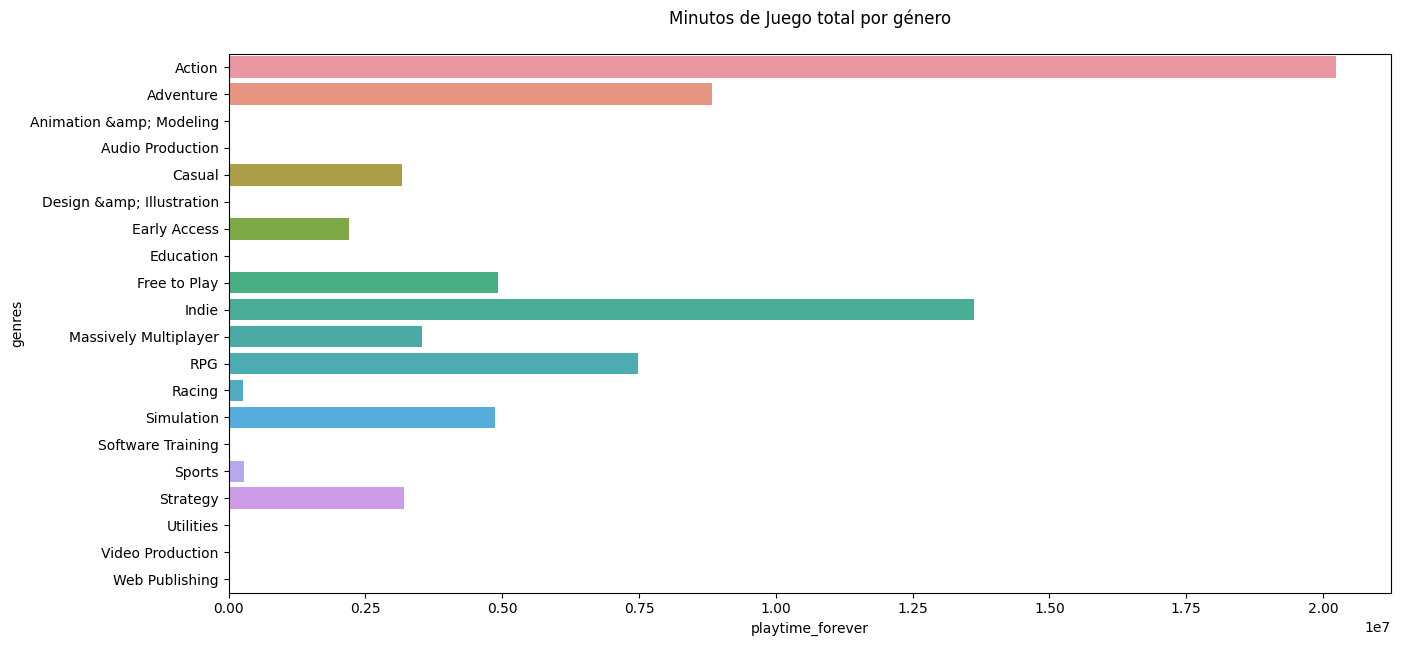

In [52]:
data = df_ml[['genres', 'playtime_forever']].groupby('genres').sum('playtime_forever')

plt.figure(figsize=(15,7))
sns.barplot(data=data, y=data.index, x='playtime_forever')
plt.title('Minutos de Juego total por género\n')
plt.show()

Tomamos columnas numéricas para buscar correlaciones

In [54]:
df_ml_num = df_ml[['item_id', 'playtime_forever', 'recommend', 'sentiment_analysis']]
df_ml_num

,item_id,playtime_forever,recommend,sentiment_analysis
0,10,3895,1,2
1,10,264,1,2
2,10,54,1,2
3,10,1457,1,1
4,10,441,1,2
...,...,...,...,...
50498,364510,302,1,2
50499,364510,302,1,2
50500,381850,48,1,2
50501,381850,48,1,2


Matriz de correlación

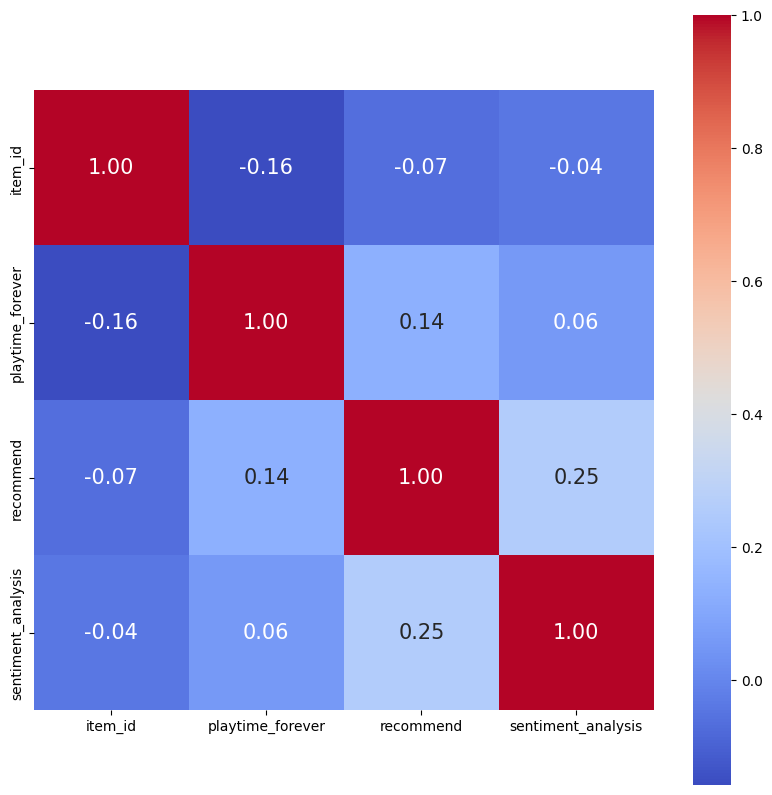

In [55]:
corr = df_ml_num.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df_ml_num.columns,
           yticklabels= df_ml_num.columns,
           cmap= 'coolwarm')
plt.show()

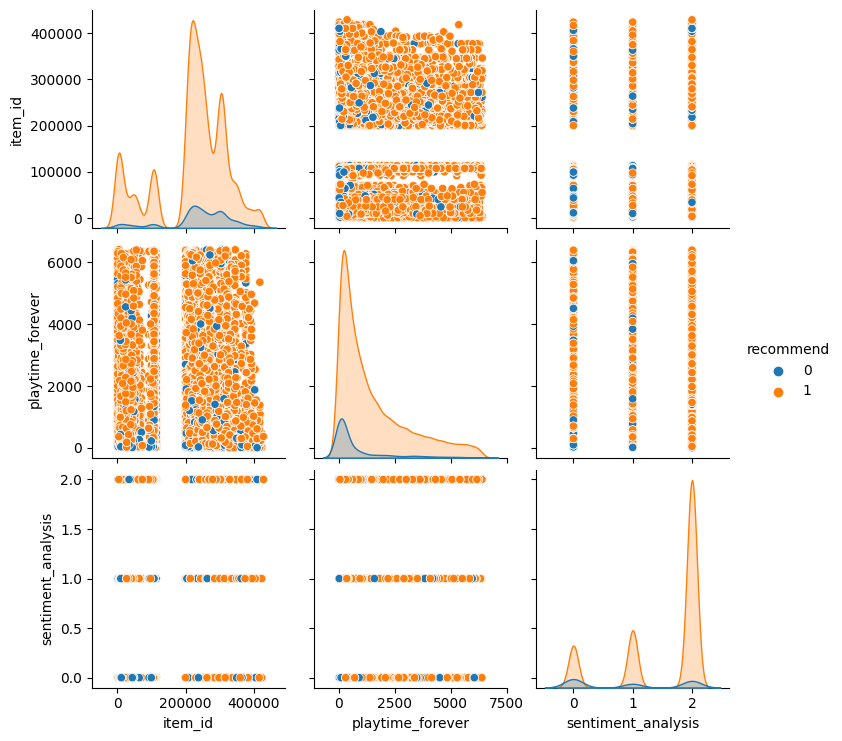

In [56]:
sns.pairplot(df_ml_num, hue='recommend')